In [1]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
import mpltex

mpl.rcParams['font.size'] = 15
import matplotlib
matplotlib.rcParams['xtick.major.pad']='8'
matplotlib.rcParams['ytick.major.pad']='5'

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"

matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25) 
matplotlib.rcParams['xtick.major.pad']='8'
matplotlib.rcParams['ytick.major.pad']='5'
matplotlib.rcParams.update({'font.size': 15})

#matplotlib.rc('xtick', labelsize=15) 
#matplotlib.rc('ytick', labelsize=15) 
#matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['xtick.major.pad']='10'
matplotlib.rcParams['ytick.major.pad']='7'
matplotlib.rcParams['lines.linewidth'] = 2

In [2]:
import RateTheories as rt

In [3]:
xEq1 = np.genfromtxt('Equilibrium/tauM(1,0.05,0.005)tau(0.001-0.003-0.005-0.008-0.01-0.05-0.1-0.2-0.3-1).txt')
xEq01 = np.genfromtxt('Equilibrium/tauM01tau(0.001-0.003-0.005-0.008-0.01-0.05-0.1-0.2-0.3).txt')
xEq001 = np.genfromtxt('Equilibrium/tauM001tau(0.001-0.003-0.005-0.008-0.01-0.05-0.1-0.2-0.3).txt')
Markovian = np.genfromtxt('Equilibrium/MarkovintauM(0.0001-0.001-0.05-0.5-0.1-1-5-10-100)U0(3-5-8).txt')
xU = np.genfromtxt('Equilibrium/tauM(01-001)tau(0.001-0.005-0.01-0.05-0.1-0.3-1)U(5-8).txt')

In [4]:
# (first, for conversion from my units to yours)
k = 1.38064852e-23 # m2 kg s-2 K-1
T = 300 # K
amu = 1.66054e-27 # kg
kT= k*300*1e18/(amu*1e24)
print('1 kT =',kT,'amu nm^2/ps^2')

1 kT = 2.494336517036626 amu nm^2/ps^2


In [5]:
def CalculateRateTheoryInputParams(tm_by_td,tg_by_td,
                                   VNeq=3, # kT
                                   L=1., # nm
                                   gamma=1000.): # amu/ps
    global kT
    td = L**2*gamma/kT # ps
    tm = td*tm_by_td # ps
    alpha = tg_by_td*tm_by_td*td**2 # ps^2
    w0 = np.sqrt(8*VNeq/(td*tm)) # ps^{-1}
    wNeq = np.sqrt(4*VNeq/(td*tm)) # ps^{-1}
    gamma_by_m = 1./(td*tm_by_td) # ps^{-1}
    return gamma_by_m, alpha, VNeq, wNeq, w0, td, tm

In [6]:
tm_by_td = np.logspace(-5,5,num=600)
#tg_by_td = np.logspace(-3,2,num=6)
tg_by_td_string = ['0.01','1.0','10.0']
tg_by_td = np.array(tg_by_td_string,
                    dtype=float)


RatesPGH = np.zeros([len(tg_by_td),len(tm_by_td)])
RatesGH = np.zeros([len(tg_by_td),len(tm_by_td)])
RatesKramers = np.zeros([len(tg_by_td),len(tm_by_td)])
RatesMM = np.zeros([len(tg_by_td),len(tm_by_td)])
td_array = np.zeros([len(tg_by_td),len(tm_by_td)])

VNeq3 = 3.
VNeq5 = 5.
VNeq8 = 8.
S1_integral = rt.S1_integral(VNeq3)

for i,e in enumerate(tg_by_td):
    for j,f in enumerate(tm_by_td):
        gamma_by_m, alpha, VNeq, wNeq, w0, td, tm = CalculateRateTheoryInputParams(f,
                                                                                   e,
                                                                                   gamma=1000,
                                                                                  VNeq=VNeq3)
        td_array[i,j] = td
        RatesGH[i,j] = rt.GH(gamma_by_m,VNeq,wNeq,w0,e*td)
        RatesPGH[i,j] = rt.PGH(gamma_by_m,alpha,VNeq,wNeq,w0)[0].real
        RatesKramers[i,j] = rt.Kramers(gamma_by_m,w0,wNeq,VNeq)
        RatesMM[i,j] = rt.MM(tm,td,VNeq,wNeq,w0,S1_integral)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


In [7]:
RatesPGH5 = np.zeros([len(tg_by_td),len(tm_by_td)])
RatesGH5 = np.zeros([len(tg_by_td),len(tm_by_td)])
RatesKramers5 = np.zeros([len(tg_by_td),len(tm_by_td)])
RatesMM5 = np.zeros([len(tg_by_td),len(tm_by_td)])
td_array5 = np.zeros([len(tg_by_td),len(tm_by_td)])

S1_integral5 = rt.S1_integral(VNeq5)

for i,e in enumerate(tg_by_td):
    for j,f in enumerate(tm_by_td):
        gamma_by_m5, alpha5, VNeq5, wNeq5, w05, td5, tm5 = CalculateRateTheoryInputParams(f,
                                                                                   e,
                                                                                   gamma=1000,
                                                                                  VNeq=VNeq5)
        td_array5[i,j] = td5
        RatesGH5[i,j] = rt.GH(gamma_by_m5,VNeq5,wNeq5,w05,e*td5)
        RatesPGH5[i,j] = rt.PGH(gamma_by_m5,alpha5,VNeq5,wNeq5,w05)[0].real
        RatesKramers5[i,j] = rt.Kramers(gamma_by_m5,w05,wNeq5,VNeq5)
        RatesMM5[i,j] = rt.MM(tm5,td5,VNeq5,wNeq5,w05,S1_integral5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


In [8]:
RatesPGH8 = np.zeros([len(tg_by_td),len(tm_by_td)])
RatesGH8 = np.zeros([len(tg_by_td),len(tm_by_td)])
RatesKramers8 = np.zeros([len(tg_by_td),len(tm_by_td)])
RatesMM8 = np.zeros([len(tg_by_td),len(tm_by_td)])
td_array8 = np.zeros([len(tg_by_td),len(tm_by_td)])

S1_integral8 = rt.S1_integral(VNeq8)

for i,e in enumerate(tg_by_td):
    for j,f in enumerate(tm_by_td):
        gamma_by_m8, alpha8, VNeq8, wNeq8, w08, td8, tm8 = CalculateRateTheoryInputParams(f,
                                                                                   e,
                                                                                   gamma=1000,
                                                                                  VNeq=VNeq8)
        td_array8[i,j] = td8
        RatesGH8[i,j] = rt.GH(gamma_by_m8,VNeq8,wNeq8,w08,e*td8)
        RatesPGH8[i,j] = rt.PGH(gamma_by_m8,alpha8,VNeq8,wNeq8,w08)[0].real
        RatesKramers8[i,j] = rt.Kramers(gamma_by_m8,w08,wNeq8,VNeq8)
        RatesMM8[i,j] = rt.MM(tm8,td8,VNeq8,wNeq8,w08,S1_integral8)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


In [9]:
#def ProvaEq(U0, tau, tauM):
 #   return (np.exp(U0)*((tauM/U0 + 8*tau**2) + ( (1/(8*U0))*(1/(1 + (8*U0*tau)**2)))))
#def ProvaEq2(U0, tau, tauM, alpha2, alpha3):
 #   return (np.exp(U0)*(((tauM/U0 + 8*tau**2))**alpha3 + ( ((alpha2/(8*U0))*(1/(1 + (8*U0*tau)**2)))**alpha3))**(1/alpha3))
#def ProvaMarkovian(U0, tauM):
 #   return (np.exp(U0)*((tauM/U0 ) +(1/(8*U0))))
#def ProvaMarkovian2(tauM, alpha_3):
 #   return (np.exp(3)*(((4*np.pi*tauM)/3 )**(alpha_3) +( 4*np.pi/(8*3))**(alpha_3))**(1/ alpha_3))
#def ProvaMarkovian3(U0, tauM,a,b,c):
 #   return (np.exp(U0)*(((a*tauM)/U0 )**c +(b/(16*U0))**c)**(1/c))
#def MM(U0, tauM):
 #   return (np.exp(U0)*(np.pi*np.sqrt(tauM/(U0))))
#def RolandU(U0, tauM):
 #   return (np.exp(U0)*(4*np.pi*tauM))
#def RolandO(U0):
 #   return (np.exp(U0)*(np.pi/(4*U0)))
#def Kramers2(U0):
 #   return (np.exp(U0)*(np.pi/(4*U0*np.sqrt(2))))

In [10]:
def MM2(U0, tauM):
    return (np.exp(U0)*(3*np.pi*tauM)/(8*np.sqrt(2)*U0))

def Kramers(U0):
    return (np.exp(U0)*(np.pi*np.sqrt(2)/(4*U0)))

In [11]:
#def TauS(U0, tauM):
 #   return(np.exp(U0)*(4*np.pi*tauM)/(1-np.sqrt(1-32*tauM*U0)))

#def Mark(U0,tauM,alpha3):
   # return((np.exp(U0)/U0)*tauM*((3*np.pi/(8*np.sqrt(2)))**(alpha3) + (np.sqrt(2)*np.pi/(4*tauM))**(alpha3))**(1/alpha3))

def Mark2(U0,tauM,alpha3):
    return((np.exp(U0))*((3*np.pi*tauM/(8*np.sqrt(2)*U0))**(alpha3) + (np.sqrt(2)*np.pi/(4*U0))**(alpha3))**(1/alpha3))
def Mark3(U0,tauM,alpha3):
    return((np.exp(U0)*(3*np.pi*tauM/(8*np.sqrt(2)*U0)))**(alpha3) 
                         + (np.exp(U0)*(np.sqrt(2)*np.pi/(4*U0)))**(alpha3))**(1/alpha3)

def Mark4(U0,tauM,d):
    return((np.exp(U0)/U0)*(3*np.pi*tauM/(8*np.sqrt(2)) +d*np.sqrt(U0*tauM) +np.sqrt(2)*np.pi/4))

def Mark5(U0,M,K,g):
    return((np.exp(U0))*(3*np.pi*M/(8*np.sqrt(2)*U0*g) +4*np.sqrt(2*m/K) +2*np.sqrt(2)*np.pi*g/K))

In [12]:
#m = np.logspace(-6,5)

#def  Fit3(tauM,d):
 #   return((np.exp(3)/3)*(3*np.pi*tauM/(8*np.sqrt(2)) +d*np.sqrt(3*tauM) +np.sqrt(2)*np.pi/4))

#def  Fit5(tauM,d):
 #   return((np.exp(5)/5)*(3*np.pi*tauM/(8*np.sqrt(2)) +d*np.sqrt(5*tauM) +np.sqrt(2)*np.pi/4))

#def  Fit8(tauM,d):
 #   return((np.exp(8)/8)*(3*np.pi*tauM/(8*np.sqrt(2)) +d*np.sqrt(8*tauM) +np.sqrt(2)*np.pi/4))

#popt3, pcov3 = curve_fit(Fit3,MT,  Markovian[1,1:])
#popt5, pcov5 = curve_fit(Fit5,MT,  Markovian[2,1:])
#popt8, pcov8 = curve_fit(Fit8,MT,  Markovian[3,1:])

#print(popt3)
#print(popt5)
#print(popt8)

In [13]:
#M = [1, 0.1, 0.05, 0.01, 0.005]
#T001 = [36.5007384512744,13.9174086932, 11.1986790018632, 9.0208258, 8.84888697091073]
#popt, pcov = curve_fit(ProvaMarkovian2,M, T001)
#popt

In [14]:
Markovian[1,1:]

array([   8.68894808,    9.04414102,   11.84779047,   14.25053772,
         25.69116674,   36.89003114,   98.63821509,  162.52193483,
       1024.5344955 ])

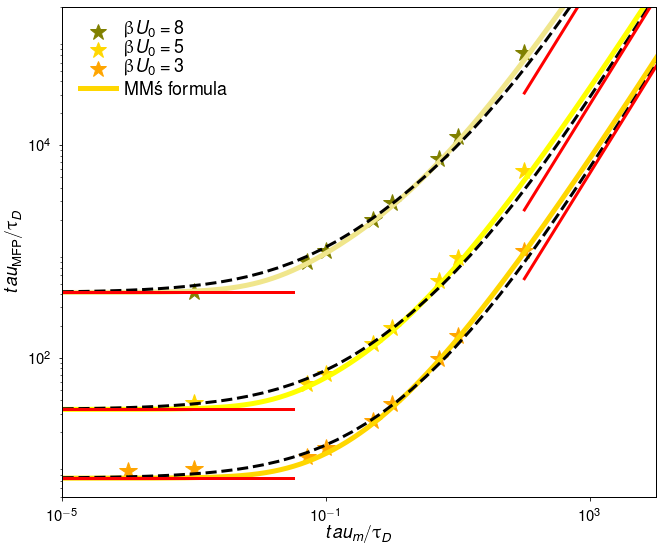

In [15]:
m = np.logspace(-6,5)
ms = np.logspace(-6,-1.5)
ml = np.logspace(2,5)
#Mv = np.zeros(50)
Kv3 = np.zeros(50)
Kv5 = np.zeros(50)
Kv8 = np.zeros(50)

for i in range (0,50):
 #   Mv[i]= RolandO(3)
    Kv3[i]= Kramers(3)
    Kv5[i]= Kramers(5)
    Kv8[i]= Kramers(8)
    
T001 = [36.5007384512744,13.9174086932, 11.1986790018632, 9.0208258, 8.84888697091073]
M = [1, 0.1, 0.05, 0.01, 0.005]
MT = [0.0001, 0.001, 0.05, 0.1, 0.5, 1, 5,10, 100]


@mpltex.acs_decorator
def my_plot2(MT):
    fig, ax = plt.subplots(1,1,figsize=(10,8))

    #ax.plot(M, T001, '*y',markersize=18)
    ax.plot(MT, Markovian[3,1:], '*',color='olive',markersize=18, label = '$\\beta U_0 = 8$')
    ax.plot(MT, Markovian[2,1:], '*',color='gold',markersize=18, label = '$\\beta U_0 = 5$')
    ax.plot(MT, Markovian[1,1:], '*',color='orange',markersize=18, label = '$\\beta U_0 = 3$')
    
    ax.plot(tm_by_td,1./RatesMM[0]/td_array[0],lw=5,color='gold',label=r'MM\'s formula')
    ax.plot(tm_by_td,1./RatesMM5[0]/td_array[0],lw=5,color='yellow')#,label=r'Melnikov-Meshkov')
    ax.plot(tm_by_td,1./RatesMM8[0]/td_array[0],lw=5,color='khaki')#,label=r'Melnikov-Meshkov')

    #ax.plot(m, Mark4(3,m,1),'--',color ='blue', label = 'd = 1')
    #ax.plot(m, Mark4(5,m,1), '--',color ='blue')
    #ax.plot(m, Mark4(8,m,1),'--',color ='blue')

    
    ax.plot(m, Mark4(3,m,2),'--',color ='k',lw=3)#, label = 'd = 2')
    ax.plot(m, Mark4(5,m,2), '--',color ='k',lw=3)
    ax.plot(m, Mark4(8,m,2),'--',color ='k',lw=3)
    
    #ax.plot(m, Mark4(3,m,3),'--',color ='magenta', label = 'd = 3')
    #ax.plot(m, Mark4(5,m,3), '--',color ='magenta')
    #ax.plot(m, Mark4(8,m,3),'--',color ='magenta')
    
    
    ax.plot(ms, Kv3,'-', color ='red',lw=3)
    ax.plot(ms, Kv5,'-', color ='red',lw=3)
    ax.plot(ms, Kv8,'-', color ='red',lw=3)

    ax.plot(ml, MM2(3,ml),'-', color ='red',lw=3)
    ax.plot(ml, MM2(5,ml),'-', color ='red',lw=3)
    ax.plot(ml, MM2(8,ml),'-', color ='red',lw=3)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_yticks(ax.get_yticks()[1::2])
    ax.set_ylim(5e0,2e5)
    ax.set_xticks(ax.get_xticks()[::2])
    ax.set_xlim(1e-5,1e4)
    ax.legend(loc='upper left',fontsize=18,ncol=1,frameon=False,
          labelspacing=0.1, # the vertical space between the legend entries
          columnspacing=0.7) # the spacing between columns)
    #ax.set_xlabel(r'$\tau_m/\tau_D$',fontsize=18)
    #ax.set_ylabel(r'$\tau_{\mathrm{MFP}}/\tau_D$',fontsize=18)

    ax.set_xlabel(r'$\\tau_m/\tau_D$',fontsize=18)
    ax.set_ylabel(r'$\\tau_{\mathrm{MFP}}/\tau_D$',fontsize=18)

    ax.tick_params(axis='both', labelsize=15)
    plt.show(fig)
    #fig.savefig('MM.pdf', bbox_inches='tight')
    plt.close(fig)
my_plot2(MT) 

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


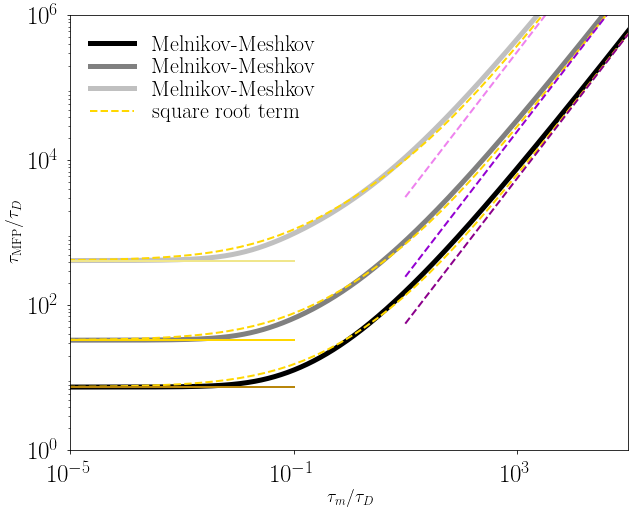

In [16]:
m = np.logspace(-6,5)
ms = np.logspace(-6,-1)
ml = np.logspace(1,5)
#Mv = np.zeros(50)
Kv3 = np.zeros(50)
Kv5 = np.zeros(50)
Kv8 = np.zeros(50)

for i in range (0,50):
 #   Mv[i]= RolandO(3)
    Kv3[i]= Kramers(3)
    Kv5[i]= Kramers(5)
    Kv8[i]= Kramers(8)
    
T001 = [36.5007384512744,13.9174086932, 11.1986790018632, 9.0208258, 8.84888697091073]
M = [1, 0.1, 0.05, 0.01, 0.005]
MT = [0.0001, 0.001, 0.05, 0.1, 0.5, 1, 5,10, 100]
fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(tm_by_td,1./RatesMM[0]/td_array[0],lw=5,color='k',label=r'Melnikov-Meshkov')
ax.plot(tm_by_td,1./RatesMM5[0]/td_array[0],lw=5,color='grey',label=r'Melnikov-Meshkov')
ax.plot(tm_by_td,1./RatesMM8[0]/td_array[0],lw=5,color='silver',label=r'Melnikov-Meshkov')

#ax.plot(m, Mark(3,m,0.4),'c.')
#ax.plot(m, Mark(5,m,0.4), 'b.')
#ax.plot(m, Mark(8,m,0.4),'.', color ='darkblue')

#ax.plot(m, Mark3(3,m,0.6),'b.',label = '$\\alpha_3 = 0.6$')
#ax.plot(m, Mark3(5,m,0.6), 'b.')
#ax.plot(m, Mark3(8,m,0.6),'.', color ='blue')

#ax.plot(m, Mark3(3,m,0.5),'c.',label = '$\\alpha_3 = 0.5$')
#ax.plot(m, Mark3(5,m,0.5), 'c.')
#ax.plot(m, Mark3(8,m,0.5), '.',color ='c')

#ax.plot(m, Mark3(3,m,0.4),'m.',label = '$\\alpha_3 = 0.4$')
#ax.plot(m, Mark3(5,m,0.4), 'm.')
#ax.plot(m, Mark3(8,m,0.4), '.',color ='m')

#ax.plot(m, Mark3(3,m,0.3),'r.',label = '$\\alpha_3 = 0.3$')
#ax.plot(m, Mark3(5,m,0.3), 'r.')#
#ax.plot(m, Mark3(8,m,0.3), '.',color ='r')

ax.plot(m, Mark4(3,m,2),'--',color ='gold', label = 'square root term')
ax.plot(m, Mark4(5,m,2), '--',color ='gold')
ax.plot(m, Mark4(8,m,2),'--',color ='gold')

#ax.plot(m, Markovian(3,m, (3*np.pi)/(8*np.sqrt(2)), 2*np.sqrt(2)*np.pi,0.6),'m--', label='$\\alpha_3 = 0.6$')

#ax.plot(m, TauP(3,m),'--', color ='darkblue')
#ax.plot(m, TauS(3,m), color ='darkred')
#ax.plot(m, TauS(5,m), color ='firebrick')
#ax.plot(m, TauS(8,m), color ='lightcoral')

ax.plot(ms, Kv3, color ='darkgoldenrod')
ax.plot(ms, Kv5, color ='gold')
ax.plot(ms, Kv8, color ='khaki')

ax.plot(ml, MM2(3,ml),'--', color ='darkmagenta')
ax.plot(ml, MM2(5,ml),'--', color ='darkviolet')
ax.plot(ml, MM2(8,ml),'--', color ='violet')

#ax.plot(M, T001, '*y',markersize=18)
#ax.plot(MT, Markovian[1,1:], '*k',markersize=18)
#ax.plot(MT, Markovian[2,1:], '*',color='grey',markersize=18)
#ax.plot(MT, Markovian[3,1:], '*',color='silver',markersize=18)

#ax.plot(m, RolandU(3,m), '-b',markersize=18, label='$ \\tau  = 4\\pi \\tau_m e^{\\beta U_0}$')
#ax.plot(m, MM2(3,m), 'r',markersize=18, label='$ \\tau  = \\frac{3\\pi \\tau_m}{8\\sqrt{2}U_0\\beta}e^{\\beta U_0}$')
#ax.plot(m, MM(3,m), 'm',markersize=18, label='$ \\tau  = \\pi \\sqrt{\\frac{\\tau_m\\tau_D}{U_0\\beta}}e^{\\beta U_0}$')
#ax.plot(m, Kv, '--c',markersize=18, label='$ \\tau  = \\frac{\\sqrt{2}\\pi \\tau_D}{4U_0\\beta}e^{\\beta U_0}$')
#ax.plot(m, Mv, '--y',markersize=18, label='$ \\tau  = \\frac{\\pi \\tau_D}{4U_0\\beta}e^{\\beta U_0}$')
#ax.plot(m, Kv2, '--g',markersize=18, label='$ \\tau  = \\frac{\\pi \\tau_D}{4\\sqrt{2}U_0\\beta}e^{\\beta U_0}$')

#ax.plot(m, ProvaMarkovian3(3,m, 1, 6*np.pi,0.5),'y--')
#ax.plot(m, ProvaMarkovian3(3,m, 1, 6*np.pi,3.5),'r--')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_yticks(ax.get_yticks()[1::2])
ax.set_ylim(1e0,1e6)
ax.set_xticks(ax.get_xticks()[::2])
ax.set_xlim(1e-5,1e5)
ax.legend(loc='upper left',fontsize=22,ncol=1,frameon=False,
          labelspacing=0.1, # the vertical space between the legend entries
         columnspacing=0.7 # the spacing between columns
         )
ax.set_xlabel(r'$\tau_m/\tau_D$',
             fontsize=18)
ax.set_ylabel(r'$\tau_{\mathrm{MFP}}/\tau_D$',
             fontsize=18)
plt.show(fig)
#fig.savefig('tm_PGH_GH_Langevin_broad_plot.pdf',
#           bbox_inches='tight')
plt.close(fig)

In [17]:
print(xEq1[:,5])
print(xEq01[3, 5])
print(xEq001[3, 5])

[1.00000000e-02 3.65007385e+01 1.11986790e+01 8.84888697e+00]
13.9174086932
9.0208258


In [18]:
xEq1 = np.genfromtxt('Equilibrium/tauM(10,1,0.05,0.005)tau(0.001-0.003-0.005-0.008-0.01-0.05-0.1-0.2-0.3-1).txt')
xEq01 = np.genfromtxt('Equilibrium/tauM01tau(0.001-0.003-0.005-0.008-0.01-0.05-0.1-0.2-0.3).txt')
xEq001 = np.genfromtxt('Equilibrium/tauM001tau(0.001-0.003-0.005-0.008-0.01-0.05-0.1-0.2-0.3).txt')

In [19]:
#Formula senza termine negativo accopiando H and L friction senza tau_D and tau_m
def Formula2(U0,tau,M,K,a,b):
    return((np.exp(U0))*((3*np.pi/(8*np.sqrt(2)*U0))*(M + b*K*tau**2) + (2*np.sqrt(2)*np.pi/K)*(1/(1 + 3*K*a*tau/(8*4*U0))) +4*np.sqrt(2*M/K)))

#Formula mia tranne lo speed-term che e' simile a Julian cioe con U_0
def Julian(U0,tau,M,K,a,b):
    return((np.exp(U0))*((3*np.pi/(8*np.sqrt(2)*U0))*(M + b*K*tau**2) + (2*np.sqrt(2)*np.pi/K)*(1/(1 + 10*U0*tau)) +4*np.sqrt(2*M/K)))

#Formula senza termine negativo accopiando H and L friction con gammaHeff complesso senza tau_D and tau_m 
def Formula3(U0,tau,M,K, a,b,c):
    return((np.exp(U0))*((3*np.pi/(8*np.sqrt(2)*U0))*(M + b*K*tau**2) +((np.sqrt(2)*np.pi)/K)*(np.sqrt(1 +c*(2*tau*K)**2)) + (np.sqrt(2)*np.pi/K)*(1/(1 + 3*K*a*tau/(8*2*U0))) +4*np.sqrt(2*M/K)))

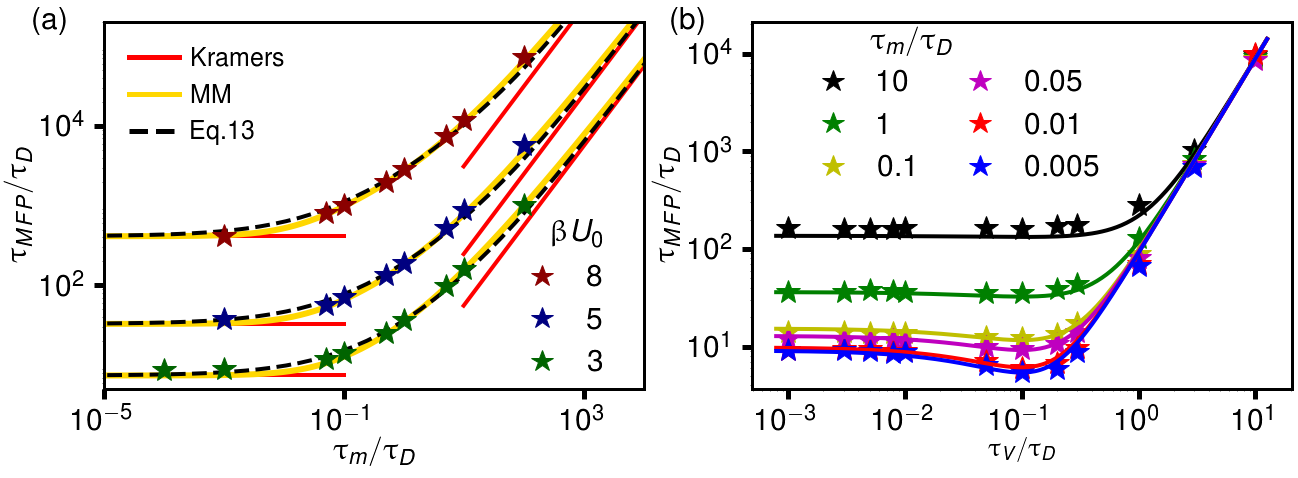

In [20]:
taueq = np.logspace(-3.1,1.1,200)
zeros = np.zeros(200)
tauEq = [0.001,0.003,0.005,0.008,0.01,0.05,0.1,0.2,0.3,1,3,10]
         
@mpltex.acs_decorator
def my_plot():       
    fig, axes = plt.subplots(1, 2,figsize=(20,6))
    
    ax = axes[0]
    
    l1, =ax.plot(ms, Kv3,'-', color ='red',lw=4)#,label='Kramers\' limits')
    ax.plot(ms, Kv5,'-', color ='red',lw=4)
    ax.plot(ms, Kv8,'-', color ='red',lw=4)

    ax.plot(ml, MM2(3,ml),'-', color ='red',lw=4)
    ax.plot(ml, MM2(5,ml),'-', color ='red',lw=4)
    ax.plot(ml, MM2(8,ml),'-', color ='red',lw=4)
    
    l2, =ax.plot(tm_by_td,1./RatesMM8[0]/td_array[0],lw=6,color='gold')#,label='MM')#,label=r'Melnikov-Meshkov')
    ax.plot(tm_by_td,1./RatesMM5[0]/td_array[0],lw=6,color='gold')#,label=r'Melnikov-Meshkov')
    ax.plot(tm_by_td,1./RatesMM[0]/td_array[0],lw=6,color='gold')

    #ax.plot(m, Mark4(3,m,1),'--',color ='blue', label = 'd = 1')
    #ax.plot(m, Mark4(5,m,1), '--',color ='blue')
    #ax.plot(m, Mark4(8,m,1),'--',color ='blue')

    l3, =ax.plot(m, Mark4(3,m,2),'--',color ='k',lw=4)#,label='Eq.13')#, label = 'd = 2')
    ax.plot(m, Mark4(5,m,2), '--',color ='k',lw=4)
    ax.plot(m, Mark4(8,m,2),'--',color ='k',lw=4)

    #ax.plot(m, Mark4(3,m,3),'--',color ='magenta', label = 'd = 3')
    #ax.plot(m, Mark4(5,m,3), '--',color ='magenta')
    #ax.plot(m, Mark4(8,m,3),'--',color ='magenta')
 
    ax.plot(MT, Markovian[3,1:], '*',color='darkred',markersize=25, label='8')
    ax.plot(MT, Markovian[2,1:], '*',color='navy',markersize=25, label='5')
    ax.plot(MT, Markovian[1,1:], '*',color='darkgreen',markersize=25, label='3')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_yticks(ax.get_yticks()[1::2])
    ax.set_ylim(5e0,2e5)
    ax.set_xticks(ax.get_xticks()[::2])
    ax.set_xlim(1e-5,1e4)
    #leg =ax.legend(bbox_to_anchor=(0.78, 0.7),fontsize=25,ncol=2,frameon=False,
     #     labelspacing=0.1, # the vertical space between the legend entries
     #     columnspacing=2) # the spacing between columns)
    
    leg1 = ax.legend(bbox_to_anchor=(0.7, 0.42),fontsize=30)
    ax.text(300, 300,"$$\\beta U_0 $$", fontsize=30)
    
    leg2 = ax.legend([l1,l2,l3],['Kramers','MM','Eq.13'],fontsize=25,loc='upper left')
    leg2.get_lines()[0].set_linewidth(5)
    leg2.get_lines()[1].set_linewidth(5)
    leg2.get_lines()[2].set_linewidth(5)
    
    # Manually add the first legend back
    ax.add_artist(leg1)
  
   
    ax.set_xlabel('$\\tau_m/\\tau_D$',fontsize=30)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)

    ax.tick_params(axis='both', labelsize=30,length = 10,width = 5)
    ax = axes[1]
    
    ax.plot(tauEq, xEq1[1,1:],'*k',markersize=25,label='$10$')
    ax.plot(tauEq, xEq1[2,1:],'*g',markersize=25,label='$1$')
    ax.plot(tauEq, xEq01[3,1:],'*y',markersize=25,label='$0.1$')
    ax.plot(tauEq, xEq1[3,1:],'*m',markersize=25,label='$0.05$')
    ax.plot(tauEq, xEq001[3,1:],'*r',markersize=25,label='$0.01$')
    ax.plot(tauEq, xEq1[4,1:],'*b',markersize=25,label='$0.005$')
    

    ax.plot(taueq, Formula2(3.,taueq,10,24,64/3,2/3),'k-',linewidth=4,markersize=6)#,label='$a = 30$')
    ax.plot(taueq, Formula2(3.,taueq,1,24,64/3,2/3),'g-',linewidth=4,markersize=6)
    ax.plot(taueq, Formula2(3.,taueq,0.1,24,64/3,2/3),'y-',linewidth=4,markersize=6)
    ax.plot(taueq, Formula2(3.,taueq,0.05,24,64/3,2/3),'m-',linewidth=4,markersize=6)
    ax.plot(taueq, Formula2(3.,taueq,0.01,24,64/3,2/3),'r-',linewidth=4,markersize=6)
    ax.plot(taueq, Formula2(3.,taueq,0.005,24,64/3,2/3),'b-',linewidth=4,markersize=6)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(bbox_to_anchor=(0.7, 0.48),fontsize=30, ncol=2)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau_V/\\tau_D$',fontsize=25)
    ax.text(0.005, 10000,"$$\\tau_m/\\tau_D $$", fontsize=30)
    #ax.set_ylim([1.5,100])
    
    ax.text(0.00000000035,18000,r'(a)', fontsize=30)
    ax.text(0.0001,18000,r'(b)', fontsize=30)

    #fig.savefig('EquilibriumtauMTutto.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()     

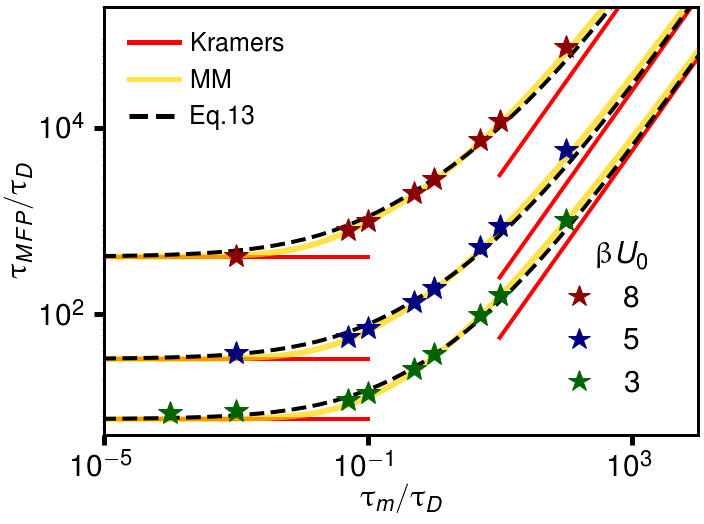

In [21]:
@mpltex.acs_decorator
def my_plot():       
    fig, ax = plt.subplots(1, 1,figsize=(10,7))
    
    l1, =ax.plot(ms, Kv3,'-', color ='red',lw=4)#,label='Kramers\' limits')
    ax.plot(ms, Kv5,'-', color ='red',lw=4)
    ax.plot(ms, Kv8,'-', color ='red',lw=4)

    ax.plot(ml, MM2(3,ml),'-', color ='red',lw=4)
    ax.plot(ml, MM2(5,ml),'-', color ='red',lw=4)
    ax.plot(ml, MM2(8,ml),'-', color ='red',lw=4)
    
    l2, =ax.plot(tm_by_td,1./RatesMM8[0]/td_array[0],lw=6,color='gold', alpha = 0.7)#,label='MM')#,label=r'Melnikov-Meshkov')
    ax.plot(tm_by_td,1./RatesMM5[0]/td_array[0],lw=6,color='gold', alpha = 0.7)#,label=r'Melnikov-Meshkov')
    ax.plot(tm_by_td,1./RatesMM[0]/td_array[0],lw=6,color='gold', alpha = 0.7)

    #ax.plot(m, Mark4(3,m,1),'--',color ='blue', label = 'd = 1')
    #ax.plot(m, Mark4(5,m,1), '--',color ='blue')
    #ax.plot(m, Mark4(8,m,1),'--',color ='blue')

    l3, =ax.plot(m, Mark4(3,m,2),'--',color ='k',lw=4)#,label='Eq.13')#, label = 'd = 2')
    ax.plot(m, Mark4(5,m,2), '--',color ='k',lw=4)
    ax.plot(m, Mark4(8,m,2),'--',color ='k',lw=4)

    #ax.plot(m, Mark4(3,m,3),'--',color ='magenta', label = 'd = 3')
    #ax.plot(m, Mark4(5,m,3), '--',color ='magenta')
    #ax.plot(m, Mark4(8,m,3),'--',color ='magenta')
 
    ax.plot(MT, Markovian[3,1:], '*',color='darkred',markersize=25, label='8')
    ax.plot(MT, Markovian[2,1:], '*',color='navy',markersize=25, label='5')
    ax.plot(MT, Markovian[1,1:], '*',color='darkgreen',markersize=25, label='3')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_yticks(ax.get_yticks()[1::2])
    ax.set_ylim(5e0,2e5)
    ax.set_xticks(ax.get_xticks()[::2])
    ax.set_xlim(1e-5,1e4)
    #leg =ax.legend(bbox_to_anchor=(0.78, 0.7),fontsize=25,ncol=2,frameon=False,
     #     labelspacing=0.1, # the vertical space between the legend entries
     #     columnspacing=2) # the spacing between columns)
    
    leg1 = ax.legend(bbox_to_anchor=(0.7, 0.42),fontsize=30)
    ax.text(300, 300,"$$\\beta U_0 $$", fontsize=30)
    
    leg2 = ax.legend([l1,l2,l3],['Kramers','MM','Eq.13'],fontsize=25,loc='upper left')
    leg2.get_lines()[0].set_linewidth(5)
    leg2.get_lines()[1].set_linewidth(5)
    leg2.get_lines()[2].set_linewidth(5)
    
    # Manually add the first legend back
    ax.add_artist(leg1)
  
   
    ax.set_xlabel('$\\tau_m/\\tau_D$',fontsize=30)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)

    ax.tick_params(axis='both', labelsize=30,length = 10,width = 5)
    #fig.savefig('EquilibriumMM.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()     

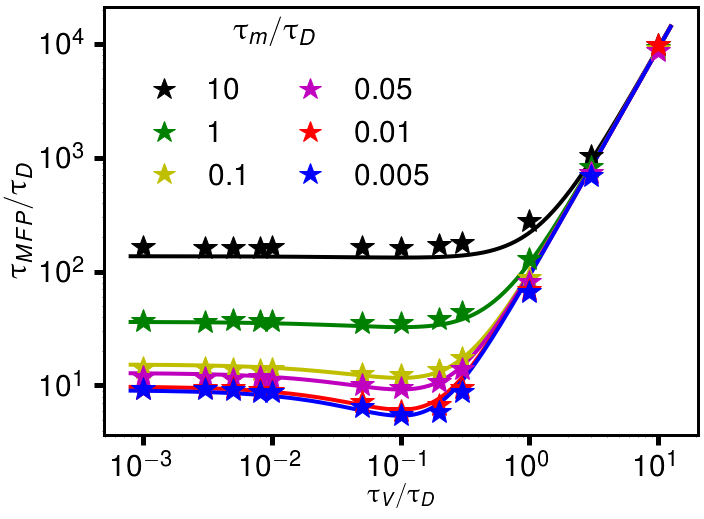

In [22]:
@mpltex.acs_decorator
def my_plot():       
    fig, ax = plt.subplots(1, 1,figsize=(10,7))
    
    ax.plot(taueq, Formula2(3.,taueq,10,24,64/3,2/3),'k-',linewidth=4,markersize=6)#,label='$a = 30$')
    ax.plot(taueq, Formula2(3.,taueq,1,24,64/3,2/3),'g-',linewidth=4,markersize=6)
    ax.plot(taueq, Formula2(3.,taueq,0.1,24,64/3,2/3),'y-',linewidth=4,markersize=6)
    ax.plot(taueq, Formula2(3.,taueq,0.05,24,64/3,2/3),'m-',linewidth=4,markersize=6)
    ax.plot(taueq, Formula2(3.,taueq,0.01,24,64/3,2/3),'r-',linewidth=4,markersize=6)
    ax.plot(taueq, Formula2(3.,taueq,0.005,24,64/3,2/3),'b-',linewidth=4,markersize=6)
    
    ax.plot(tauEq, xEq1[1,1:],'*k',markersize=25,label='$10$')
    ax.plot(tauEq, xEq1[2,1:],'*g',markersize=25,label='$1$')
    ax.plot(tauEq, xEq01[3,1:],'*y',markersize=25,label='$0.1$')
    ax.plot(tauEq, xEq1[3,1:],'*m',markersize=25,label='$0.05$')
    ax.plot(tauEq, xEq001[3,1:],'*r',markersize=25,label='$0.01$')
    ax.plot(tauEq, xEq1[4,1:],'*b',markersize=25,label='$0.005$')
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(bbox_to_anchor=(0.6, 0.50),fontsize=30, ncol=2)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau_V/\\tau_D$',fontsize=25)
    ax.text(0.005, 10000,"$$\\tau_m/\\tau_D $$", fontsize=30)
    #ax.set_ylim([1.5,100])
   
    #fig.savefig('Equilibrium.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()     

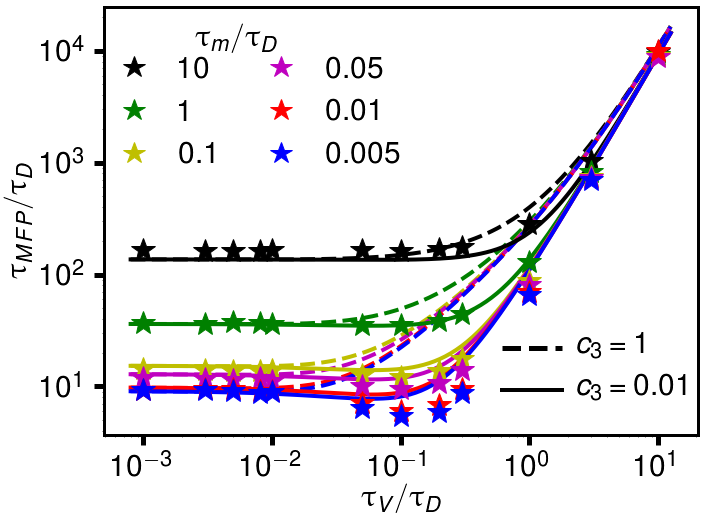

In [23]:
taueq = np.logspace(-3.1,1.1,200)
zeros = np.zeros(200)
tauEq = [0.001,0.003,0.005,0.008,0.01,0.05,0.1,0.2,0.3,1,3,10]
         
@mpltex.acs_decorator
def my_plot():       
    fig, ax = plt.subplots(1, 1,figsize=(10,7))
    
    l1, = ax.plot(taueq, Formula3(3.,taueq,10,24,32/3,2/3,1),'k--',linewidth=4)#,label='$a = 30$')
    ax.plot(taueq, Formula3(3.,taueq,1,24,32/3,2/3,1),'g--',linewidth=4)
    ax.plot(taueq, Formula3(3.,taueq,0.1,24,32/3,2/3,1),'y--',linewidth=4)
    ax.plot(taueq, Formula3(3.,taueq,0.05,24,32/3,2/3,1),'m--',linewidth=4)
    ax.plot(taueq, Formula3(3.,taueq,0.01,24,32/3,2/3,1),'r--',linewidth=4)
    ax.plot(taueq, Formula3(3.,taueq,0.005,24,32/3,2/3,1),'b--',linewidth=4)
    
    l2, =ax.plot(taueq, Formula3(3.,taueq,10,24,32/3,2/3,0.01),'k-',linewidth=4)#,label='$a = 30$')
    ax.plot(taueq, Formula3(3.,taueq,1,24,32/3,2/3,0.01),'g-',linewidth=4)
    ax.plot(taueq, Formula3(3.,taueq,0.1,24,32/3,2/3,0.01),'y-',linewidth=4)
    ax.plot(taueq, Formula3(3.,taueq,0.05,24,32/3,2/3,0.01),'m-',linewidth=4)
    ax.plot(taueq, Formula3(3.,taueq,0.01,24,32/3,2/3,0.01),'r-',linewidth=4)
    ax.plot(taueq, Formula3(3.,taueq,0.005,24,32/3,2/3,0.01),'b-',linewidth=4) 
    
    ax.plot(tauEq, xEq1[1,1:],'*k',markersize=25,label='$10$')
    ax.plot(tauEq, xEq1[2,1:],'*g',markersize=25,label='$1$')
    ax.plot(tauEq, xEq01[3,1:],'*y',markersize=25,label='$0.1$')
    ax.plot(tauEq, xEq1[3,1:],'*m',markersize=25,label='$0.05$')
    ax.plot(tauEq, xEq001[3,1:],'*r',markersize=25,label='$0.01$')
    ax.plot(tauEq, xEq1[4,1:],'*b',markersize=25,label='$0.005$')
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau_V/\\tau_D$',fontsize=30)
    ax.text(0.0025, 10000,"$$\\tau_m/\\tau_D $$", fontsize=30)
    
    leg1 = ax.legend(bbox_to_anchor=(0.55, 0.55),fontsize=30, ncol=2)
   
    leg2 = ax.legend([l1,l2],['$c_3 =1$','$c_3 =0.01$'],bbox_to_anchor=(0.62, 0.3),fontsize=30)
    leg2.get_lines()[0].set_linewidth(5)
    #leg2.get_lines()[1].set_linewidth(5)

    ax.add_artist(leg1)
    #ax.set_ylim([1.5,100])
    

    #fig.savefig('c3.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()     

NameError: name 'tauEqU' is not defined

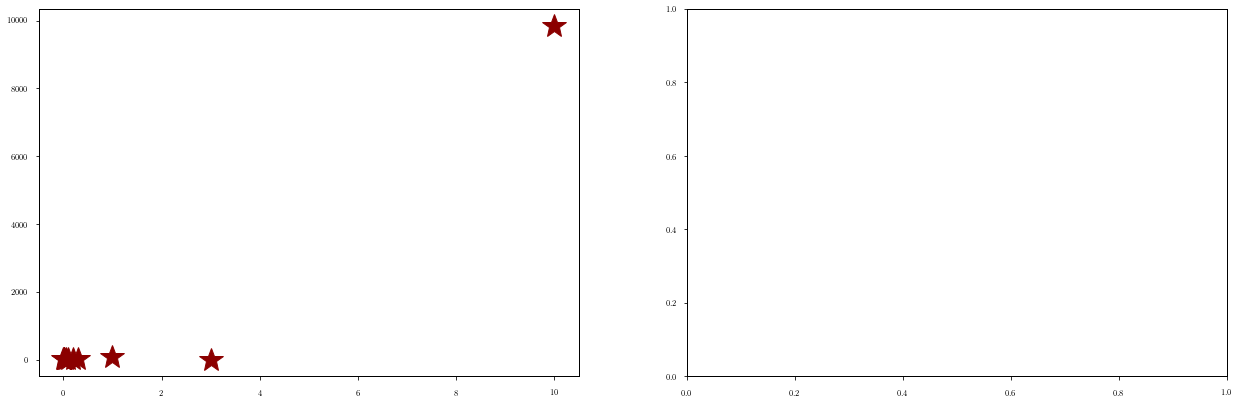

In [24]:
@mpltex.acs_decorator
def my_plot():       
    fig, axes = plt.subplots(1, 2,figsize=(20,6))
    
    ax = axes[0]
    
    ax.plot(tauEq, xEq001[3,1:],'*',color='darkred',markersize=25,label='$\\beta U_0 = 3$')
    ax.plot(tauEqU, xU[3,1:],'*',color='navy',markersize=25,label='$\\beta U_0 = 5$')
    ax.plot(tauEqU, xU[4,1:],'*',color='darkgreen',markersize=25,label='$\\beta U_0 = 8$')
   
    ax.plot(taueq, Formula2(3.,taueq,0.01,24,64/3,2/3),'-',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, Formula2(5.,taueqU,0.01,40,64/3,2/3),'-',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, Formula2(8.,taueqU,0.01,65,64/3,2/3),'-',color='darkgreen',linewidth=4,markersize=6)
    
    #ax.plot(taueq, Julian(3.,taueq,0.01,24,64/3,2/3),'--',color='darkred',linewidth=4,markersize=6)
    #ax.plot(taueqU, Julian(5.,taueqU,0.01,40,64/3,2/3),'--',color='navy',linewidth=4,markersize=6)
    #ax.plot(taueqU, Julian(8.,taueqU,0.01,65,64/3,2/3),'--',color='darkgreen',linewidth=4,markersize=6)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau_V/\\tau_D$',fontsize=30)
    ax.set_title('$\\tau_m/\\tau_D = 0.01$',fontsize=35)
    
    ax = axes[1]
    
    ax.plot(tauEq, xEq01[3,1:],'*',color='darkred',markersize=25,label='$\\beta U_0 = 3$')
    ax.plot(tauEqU, xU[1,1:],'*',color='navy',markersize=25,label='$\\beta U_0 = 5$')
    ax.plot(tauEqU, xU[2,1:],'*',color='darkgreen',markersize=25,label='$\\beta U_0 = 8$')
   
    ax.plot(taueq, Formula2(3.,taueq,0.1,24,64/3,2/3),'-',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, Formula2(5.,taueqU,0.1,40,64/3,2/3),'-',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, Formula2(8.,taueqU,0.1,64,64/3,2/3),'-',color='darkgreen',linewidth=4,markersize=6)
    
    #ax.plot(taueq, Julian(3.,taueq,0.1,24,64/3,2/3),'--',color='darkred',linewidth=4,markersize=6)
    #ax.plot(taueqU, Julian(5.,taueqU,0.1,40,64/3,2/3),'--',color='navy',linewidth=4,markersize=6)
    #ax.plot(taueqU, Julian(8.,taueqU,0.1,65,64/3,2/3),'--',color='darkgreen',linewidth=4,markersize=6)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau_V/\\tau_D$',fontsize=30)
    ax.set_title('$\\tau_m/\\tau_D = 0.1$',fontsize=35)
    
    ax.text(0.00000000035,100000,r'(a)', fontsize=30)
    ax.text(0.0001,100000,r'(b)', fontsize=30)

    #fig.savefig('EquilibriumtauMTutto.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()     

In [ ]:
taueq = np.logspace(-3.1,1.1,200)
zeros = np.zeros(200)
tauEq = [0.001,0.003,0.005,0.008,0.01,0.05,0.1,0.2,0.3,1,3,10]
         
@mpltex.acs_decorator
def my_plot():       
    fig, ax = plt.subplots(1, 1,figsize=(10,7))
   
    ax.plot(taueq, Formula2(3.,taueq,0.01,24,64/3,2/3),'r-',linewidth=4,markersize=6)
    ax.plot(taueq, Formula2(3.,taueq,0.005,24,64/3,2/3),'b-',linewidth=4,markersize=6)

    ax.plot(tauEq, xEq001[3,1:],'*r',markersize=25,label='$0.01$')
    ax.plot(tauEq, xEq1[4,1:],'*b',markersize=25,label='$0.005$')
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau_V/\\tau_D$',fontsize=30)
    
    
    
    #leg2.get_lines()[1].set_linewidth(5)

    #ax.set_ylim([1.5,100])
    

    #fig.savefig('c3.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()     

In [ ]:
8*8

In [ ]:
taueq = np.logspace(-3.1,1.1,200)
taueqU = np.logspace(-3.1,0.2,200)
zeros = np.zeros(200)
tauEq = [0.001,0.003,0.005,0.008,0.01,0.05,0.1,0.2,0.3,1,3,10]
tauEqU = [0.001,0.005,0.01,0.05,0.1,0.2,0.3,1]
         
@mpltex.acs_decorator
def my_plot():       
    fig, axes = plt.subplots(1, 3,figsize=(50,10))
    
    ax = axes[0]

    ax.plot(tauEq, xEq01[3,1:],'*',color='y',markersize=25,label='$\\tau_m/\\tau_D = 0.1$')
    ax.plot(tauEq, xEq001[3,1:],'*',color='r',markersize=25,label='$\\tau_m/\\tau_D = 0.01$')
    ax.plot(tauEq, xEq1[4,1:],'*',color='b',markersize=25,label='$\\tau_m/\\tau_D = 0.005$')
   
    ax.plot(taueq, Formula2(3.,taueq,0.005,24,64/3,2/3),'-',color='b',linewidth=4,markersize=6)
    ax.plot(taueq, Formula2(3.,taueq,0.01,24,64/3,2/3),'-',color='r',linewidth=4,markersize=6)
    ax.plot(taueq, Formula2(3.,taueq,0.1,24,64/3,2/3),'-',color='y',linewidth=4,markersize=6)
    
    ax.plot(taueq, Julian(3.,taueq,0.005,24,64/3,2/3),'--',color='b',linewidth=4,markersize=6)
    ax.plot(taueq, Julian(3.,taueq,0.01,24,64/3,2/3),'--',color='r',linewidth=4,markersize=6)
    ax.plot(taueq, Julian(3.,taueq,0.1,24,64/3,2/3),'--',color='y',linewidth=4,markersize=6)
    
    ax.set_ylim([3.,1000])
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\beta U_0 =3$',fontsize=35)
    
        
    ax = axes[1]

    ax.plot(tauEq, xEq001[3,1:],'*',color='darkred',markersize=25,label='$\\beta U_0 = 3$')
    ax.plot(tauEqU, xU[3,1:],'*',color='navy',markersize=25,label='$\\beta U_0 = 5$')
    ax.plot(tauEqU, xU[4,1:],'*',color='darkgreen',markersize=25,label='$\\beta U_0 = 8$')
   
    ax.plot(taueq, Formula2(3.,taueq,0.01,24,64/3,2/3),'-',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, Formula2(5.,taueqU,0.01,40,64/3,2/3),'-',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, Formula2(8.,taueqU,0.01,65,64/3,2/3),'-',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueq, Julian(3.,taueq,0.01,24,64/3,2/3),'--',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, Julian(5.,taueqU,0.01,40,64/3,2/3),'--',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, Julian(8.,taueqU,0.01,65,64/3,2/3),'--',color='darkgreen',linewidth=4,markersize=6)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\tau_m/\\tau_D = 0.01$',fontsize=35)
    
    ax = axes[2]

    ax.plot(tauEq, xEq01[3,1:],'*',color='darkred',markersize=25,label='$\\beta U_0 = 3$')
    ax.plot(tauEqU, xU[1,1:],'*',color='navy',markersize=25,label='$\\beta U_0 = 5$')
    ax.plot(tauEqU, xU[2,1:],'*',color='darkgreen',markersize=25,label='$\\beta U_0 = 8$')
   
    ax.plot(taueq, Formula2(3.,taueq,0.1,24,64/3,2/3),'-',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, Formula2(5.,taueqU,0.1,40,64/3,2/3),'-',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, Formula2(8.,taueqU,0.1,64,64/3,2/3),'-',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueq, Julian(3.,taueq,0.1,24,64/3,2/3),'--',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, Julian(5.,taueqU,0.1,40,64/3,2/3),'--',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, Julian(8.,taueqU,0.1,65,64/3,2/3),'--',color='darkgreen',linewidth=4,markersize=6)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\tau_m/\\tau_D = 0.1$',fontsize=35)
    
    #ax.text(0.00000000035,40000,r'(a)', fontsize=30)
    #ax.text(0.0001,40000,r'(b)', fontsize=30)
       
    #ax.set_ylim([1.5,100])
   
    #fig.savefig('EquilibriumUT.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()     